### AP21110010200
### AP21110010219
### AP21110010228
### AP21110010253
### AP21110010260

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\urjcr\Downloads\glassdoor.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [5]:
df.rename(columns={
    "Revenue (Millions)":"Revenue"
},inplace=True)

In [6]:
df=df.dropna()
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [7]:
df["Genre"].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64

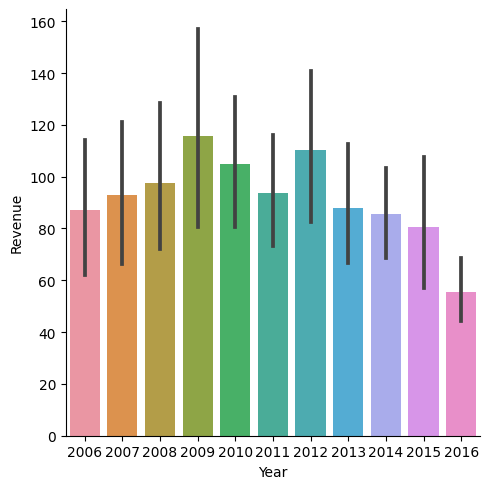

In [9]:
sns.catplot(x="Year",y='Revenue',data=df,kind="bar")

### Director collected revenue

In [10]:
# Considerd only top 10
DirRev=df.groupby("Director").Revenue.mean().sort_values(ascending=False)[:10]

In [11]:
DirRev=pd.DataFrame(DirRev)

In [12]:
DirRev.reset_index(inplace=True)

In [13]:
DirRev

,Director,Revenue
0,James Cameron,760.510
1,Colin Trevorrow,652.180
2,Joss Whedon,541.135
3,Lee Unkrich,414.980
4,Gary Ross,408.000
5,Chris Buck,400.740
6,Chris Renaud,368.310
7,Gareth Edwards,366.415
8,Tim Miller,363.020
9,Byron Howard,341.260


### Top 10 most collected movies and  their directors

Text(0, 0.5, 'Directors')

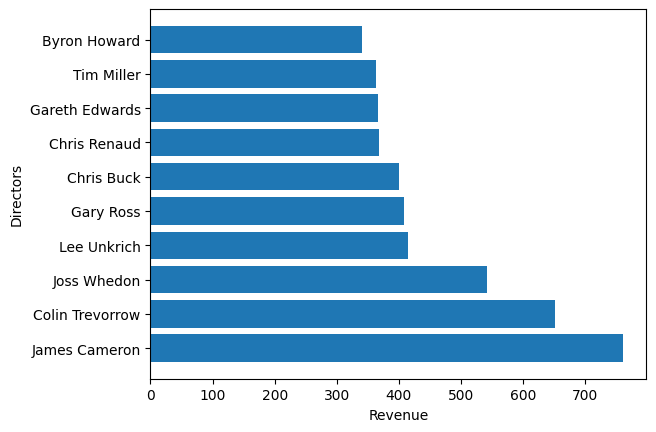

In [14]:
Directors=DirRev["Director"]
Revenue=DirRev["Revenue"]
fig, ax = plt.subplots()
ax.barh(Directors, Revenue)
ax.set_xlabel('Revenue')
ax.set_ylabel('Directors')

### Revenue over the year

In [15]:
revenue_by_year=df.groupby("Year").Revenue.sum()

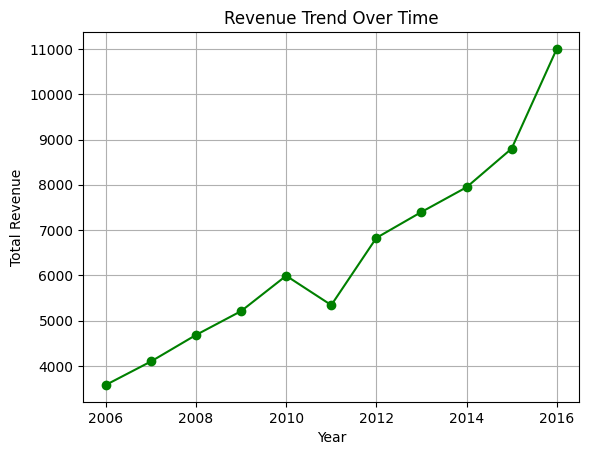

In [16]:
revenue_by_year.plot(marker='o', color='green', linestyle='-')
plt.title('Revenue Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)

### Rating

In [17]:
def ratings(row):
    if row>8:
        return "Master Piece"
    elif row>7:
        return "Good"
    else:
        return "AVG"

In [18]:
df["Rating_Group"]=df["Rating"].apply(ratings)

In [19]:
Best_Movies=df[df["Rating_Group"]=="Master Piece"]
Best_Movies=pd.DataFrame(Best_Movies)

In [ ]:
No_of_Movies=Best_Movies.groupby("Year").size()
No_of_Movies=pd.DataFrame(No_of_Movies)
No_of_Movies.reset_index(inplace=True)
No_of_Movies.rename(columns={ 
    0:"Total movies"
},inplace=True)
No_of_Movies

### top ratedd movies relesed over the years

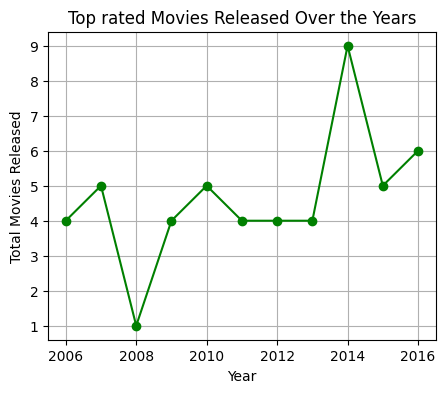

In [21]:

plt.figure(figsize=(5, 4))
plt.plot(No_of_Movies['Year'], No_of_Movies['Total movies'], marker='o', color='green', linestyle='-')
plt.title('Top rated Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Movies Released')
plt.grid(True)
plt.show()


### Total movies relesed each year

In [38]:
sample=df.groupby("Year").size()
sample=pd.DataFrame(sample)
sample.reset_index(inplace=True)
sample.rename(columns={
    0:"Total Movies"
},inplace=True) 
sample

,Year,Total Movies
0,2006,41
1,2007,44
2,2008,48
3,2009,45
4,2010,57
5,2011,57
6,2012,62
7,2013,84
8,2014,93
9,2015,109


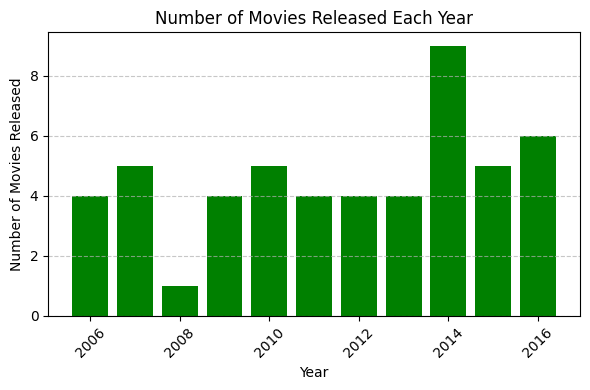

In [44]:

plt.figure(figsize=(6, 4))
plt.bar(No_of_Movies['Year'], No_of_Movies['Total movies'], color='green')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()


### Top rated movies and their collection

### Movies relesed in each year and how many there are master Piece, good, AVG in year 2016

In [51]:
df_2016=df["Rating_Group"]
rating_counts_2016=df_2016.value_counts() 

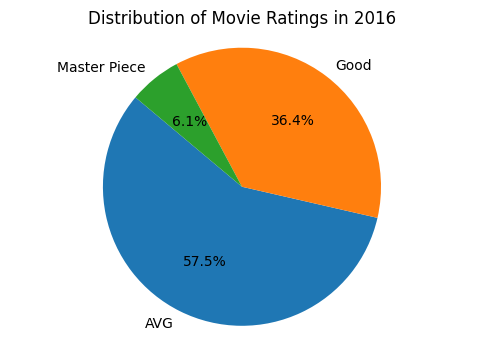

In [54]:

plt.figure(figsize=(6, 4))
plt.pie(rating_counts_2016, labels=rating_counts_2016.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Ratings in 2016') 
plt.axis('equal') 
plt.show()
